In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# df = pd.read_csv("./station_hour.csv")
df = pd.read_csv("/content/drive/MyDrive/new_data.csv")


<ipython-input-8-c9d677ff664c>:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/new_data.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   StationId   1048575 non-null  object 
 1   Datetime    1048575 non-null  object 
 2   PM2.5       800186 non-null   float64
 3   PM10        705840 non-null   float64
 4   NO          817926 non-null   float64
 5   NO2         831443 non-null   float64
 6   NOx         855903 non-null   float64
 7   NH3         581798 non-null   float64
 8   CO          827526 non-null   float64
 9   SO2         664348 non-null   float64
 10  O3          798087 non-null   float64
 11  Benzene     701860 non-null   float64
 12  Toluene     672187 non-null   float64
 13  Xylene      213458 non-null   float64
 14  AQI         809031 non-null   float64
 15  AQI_Bucket  809031 non-null   object 
dtypes: float64(13), object(3)
memory usage: 128.0+ MB


In [10]:
df.isna().sum()

,0
StationId,0
Datetime,0
PM2.5,248389
PM10,342735
NO,230649
NO2,217132
NOx,192672
NH3,466777
CO,221049
SO2,384227


In [11]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,11/24/2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,11/24/2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,11/24/2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,11/24/2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,11/24/2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [12]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as index (optional, but useful for time-series analysis)
df.set_index('Datetime', inplace=True)

In [13]:
df.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2017-11-24 17:00:00,AP001,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
2017-11-24 18:00:00,AP001,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2017-11-24 19:00:00,AP001,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
2017-11-24 20:00:00,AP001,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
2017-11-24 21:00:00,AP001,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [14]:
df.drop('Xylene', axis=1, inplace=True)

In [15]:
df.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,
2017-11-24 17:00:00,AP001,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,NaN,NaN
2017-11-24 18:00:00,AP001,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,NaN,NaN
2017-11-24 19:00:00,AP001,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,NaN,NaN
2017-11-24 20:00:00,AP001,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,NaN,NaN
2017-11-24 21:00:00,AP001,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,NaN,NaN


In [16]:
train_df = df[df.index < '2020-01-01']
test_df = df[df.index >= '2020-01-01']

In [17]:
train_df['NH3'].fillna(train_df['NH3'].median(), inplace=True)

# Forward fill other missing values (time-series assumption)
train_df.fillna(method='ffill', inplace=True)

# --- For Test Data ---
# Impute missing values in 'NH3' using the same median from train data
test_df['NH3'].fillna(train_df['NH3'].median(), inplace=True)

# Forward fill other missing values for test data as well
test_df.fillna(method='ffill', inplace=True)

<ipython-input-17-44740db28421>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['NH3'].fillna(train_df['NH3'].median(), inplace=True)
<ipython-input-17-44740db28421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['NH3'].fillna(train_df['NH3'].median(), inplace=True)
<ipython-input-17-44740db28421>:4: FutureWarning: DataFra

In [18]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())


StationId      0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
AQI           16
AQI_Bucket    16
dtype: int64
StationId     0
PM2.5         2
PM10          2
NO            2
NO2           2
NOx           2
NH3           0
CO            2
SO2           2
O3            2
Benzene       2
Toluene       2
AQI           0
AQI_Bucket    0
dtype: int64


In [19]:
train_df['hour'] = train_df.index.hour
train_df['day'] = train_df.index.day
train_df['month'] = train_df.index.month
train_df['dayofweek'] = train_df.index.dayofweek

test_df['hour'] = test_df.index.hour
test_df['day'] = test_df.index.day
test_df['month'] = test_df.index.month
test_df['dayofweek'] = test_df.index.dayofweek


<ipython-input-19-3dddbfb4c6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['hour'] = train_df.index.hour
<ipython-input-19-3dddbfb4c6e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['day'] = train_df.index.day
<ipython-input-19-3dddbfb4c6e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [20]:
features = ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'hour', 'day', 'month', 'dayofweek']
target = 'PM2.5'

# Normalize the data
scaler = MinMaxScaler()

# Fit the scaler only on the training data and transform both train and test
train_df[features + [target]] = scaler.fit_transform(train_df[features + [target]])
test_df[features + [target]] = scaler.transform(test_df[features + [target]])


<ipython-input-20-0f28fb802c7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features + [target]] = scaler.fit_transform(train_df[features + [target]])
<ipython-input-20-0f28fb802c7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[features + [target]] = scaler.transform(test_df[features + [target]])


In [21]:
# Prepare the sequences for LSTM
def create_sequences(data, target_col, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length][target_col]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length (e.g., past 24 hours)
sequence_length = 24

In [22]:
X_train, y_train = create_sequences(train_df[features + [target]].values, target_col=-1, sequence_length=sequence_length)
X_test, y_test = create_sequences(test_df[features + [target]].values, target_col=-1, sequence_length=sequence_length)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Dense output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - loss: 0.0019 - val_loss: nan
Epoch 2/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 9.6132e-04 - val_loss: nan
Epoch 3/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - loss: 9.2262e-04 - val_loss: nan
Epoch 4/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 9.2270e-04 - val_loss: nan
Epoch 5/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - loss: 9.1328e-04 - val_loss: nan
Epoch 6/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 8.9070e-04 - val_loss: nan
Epoch 7/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 8.8984e-04 - val_loss: nan
Epoch 8/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 8.5895e-04 - val_loss: nan
Epoch 9/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - loss: 8.5855e-04 - val_loss: nan
Epoch 10/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: 8.4368e-04 - val_loss: nan
Epoch 11/20
13699/13699 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 8.5526e-04 - val_

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')


In [26]:
model_save_path = '/content/drive/MyDrive/pm2_5_lstm_model.h5'

# Save the model
model.save(model_save_path)

In [31]:
# Define the path for saving just the model weights with the correct extension
weights_save_path = '/content/drive/MyDrive/pm2_5_lstm_model.weights.h5'

# Save only the weights of the model
model.save_weights(weights_save_path)


In [32]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

5371/5371 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: nan
Test Loss: nan


In [33]:
predictions = model.predict(X_test)

5371/5371 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [36]:
predictions.shape

(171847, 1)

In [38]:
# Refit the scaler using only the PM2.5 column from the training data
scaler_pm25 = MinMaxScaler()
scaler_pm25.fit(y_train.reshape(-1, 1))  # Fit the scaler on only the PM2.5 target variable


MinMaxScaler()

In [39]:
# Inverse transform using the new scaler fitted on PM2.5
y_test_scaled = scaler_pm25.inverse_transform(y_test.reshape(-1, 1))
predictions_scaled = scaler_pm25.inverse_transform(predictions)


In [49]:
print(f"NaN values in y_test_scaled: {np.isnan(y_test_scaled).sum()}")
print(f"NaN values in predictions_scaled: {np.isnan(predictions_scaled).sum()}")


NaN values in y_test_scaled: 0
NaN values in predictions_scaled: 0


In [47]:
# Remove rows with NaN values in either y_test_scaled or predictions_scaled
mask = ~np.isnan(y_test_scaled) & ~np.isnan(predictions_scaled)

# Apply mask to remove NaNs
y_test_scaled_clean = y_test_scaled[mask]
predictions_scaled_clean = predictions_scaled[mask]


In [48]:
y_test_scaled = np.nan_to_num(y_test_scaled, nan=np.nanmedian(y_test_scaled))
predictions_scaled = np.nan_to_num(predictions_scaled, nan=np.nanmedian(predictions_scaled))


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test_scaled, predictions_scaled)
mae = mean_absolute_error(y_test_scaled, predictions_scaled)
r2 = r2_score(y_test_scaled, predictions_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled_clean, predictions_scaled_clean))
mape = np.mean(np.abs((y_test_scaled_clean - predictions_scaled_clean) / y_test_scaled_clean)) * 100
correlation = np.corrcoef(y_test_scaled_clean.flatten(), predictions_scaled_clean.flatten())[0, 1]


print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Correlation Coefficient (R): {correlation}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2): 0.9015815432229132
Mean Squared Error (MSE): 0.00047411922481513353
Mean Absolute Error (MAE): 0.013237147440408631
Root Mean Squared Error (RMSE): 0.021774357281054885
Correlation Coefficient (R): 0.95527905475168
Mean Absolute Percentage Error (MAPE): 50.87794050575399


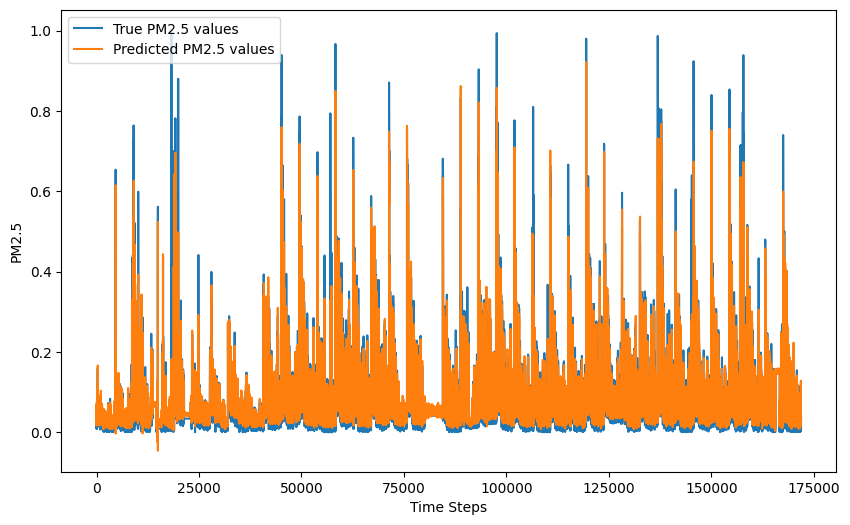

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label="True PM2.5 values")
plt.plot(predictions_scaled, label="Predicted PM2.5 values")
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

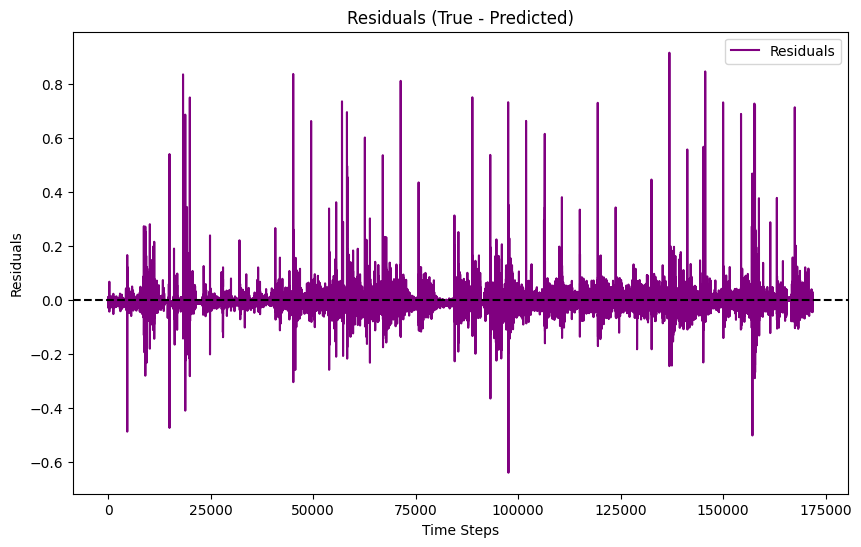

In [43]:
residuals = y_test_scaled - predictions_scaled

plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.title("Residuals (True - Predicted)")
plt.show()
